In [30]:
import pandas as pd
import numpy as np
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

In [31]:
heart = pd.read_csv("heart.csv")
heart.replace("?",np.nan)
print(heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [32]:
model = BayesianNetwork([("age","trestbps"),("sex","trestbps"),("fbs","trestbps"),("target","trestbps"),("target","thalach"),("target","chol")])
model.fit(heart,estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)

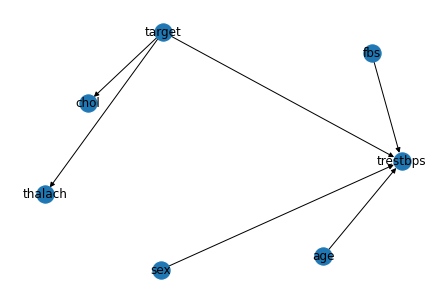

In [33]:
nx.draw(model,with_labels=True)

In [34]:
q = infer.query(variables=["target"],evidence={"age":2});
print(q)

C:\Users\Sayeed\anaconda3\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:529: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warnings.warn(


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4554 |
+-----------+---------------+
| target(1) |        0.5446 |
+-----------+---------------+
